## Program to plot the diagram for cut values in Erdős Rényi graphs of 10 nodes using classical algorithm

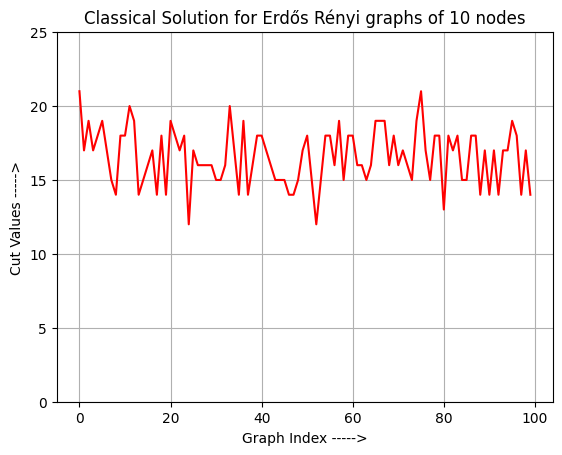

In [2]:
#importing libraries
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np

A = []  # to store graph index
B = []  # to store cut-values for different graph

for b in range(100):  # taking 100 graph index
    A.append(b)  # storing graph index
    n = 10  # for 10 nodes Erdős Rényi graphs
    G= nx.erdos_renyi_graph(n,0.5)  # generating Erdős Rényi graphs for n nodes with probability p = 0.5

    pos = nx.spring_layout(G)  # position for each nodes
    
    # for adding weights to each node
    for (u, v) in G.edges():
        G[u][v]['weight'] = random.uniform(1.0, 1.0)  # each node has weight = 1.0


    w = np.zeros([n,n])  # zeros matrix for storing weight
    for i in range(n):
        for j in range(n):
            temp = G.get_edge_data(i,j,default=0)
            if temp != 0:
                w[i][j] = temp["weight"]  
    

    sol = 0  # initializing the optimal solution
    for b in range(2**n):  # to check all 2^n combinations
        x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]  # to create binary string of 2^n combinations
        Cut_value = 0  #initializing the cut value
        for i in range(n):
            for j in range(n):
                Cut_value += w[i][j]*x[i]*(1-x[j])  # cost function
        if sol < Cut_value:
            sol = Cut_value
            xlist = x  # optimal solution

    B.append(int(sol))  # storing optimal cut-values

plt.ylim(0,25)
plt.grid()
plt.xlabel("Graph Index ----->")
plt.ylabel("Cut Values ----->")
plt.title("Classical Solution for Erdős Rényi graphs of 10 nodes")
plt.plot(A,B,color='red')
